# Lecture 21 (5/13/2022)

**Announcements**



*Last time we covered:*
- Common classification models

**Today's agenda:**
- Classification wrap-up: SVMs and beyond!
- Computational social science science ethics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Common Classification Models cont'd.

**Initialize our data**

Reminder: predictors of Coronary Heart Disease, [source](https://hastie.su.domains/ElemStatLearn/).


In [2]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')
data

x_vals = np.array(data['age']).reshape(len(data), 1)
y_vals = np.array(data['chd'])

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, random_state = 1)

Text(0, 0.5, 'CHD')

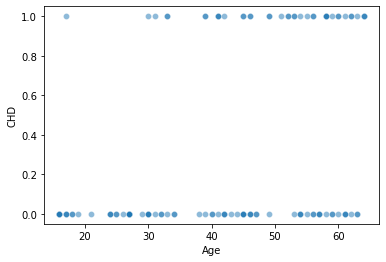

In [3]:
# sns.scatterplot(x = xtrain[:, 0], y = ytrain, alpha = .25)
sns.scatterplot(x = xtest[:, 0], y = ytest, alpha = .5)
plt.xlabel("Age")
plt.ylabel("CHD")

## Support Vector Machines (SVMs)

Support Vector Machines work by trying to find a line or plane (usually in a high-dimensional space) that *maximally separates* the training labels in that space. 

The intuition for this is relatively straightforward but the implementation can get complicated!

In the plot below, the linear funtion $h_3(x_1, x_2)$ is the best way to separate our training data because it maximizes the margin on either side of the line.

SVMs try to find the equivalent of $h_3$ given some training data. This separator can be defined by the closest points in the data to the line; these are called the "support vectors". Finding the best separator usually requires mapping the training data into a high-dimensional space where it can be effectively separated.

![svm](img/svm2.png)

([Source](https://en.wikipedia.org/wiki/Support-vector_machine))

### SVMs in python

The documentation for SVMs in scikit-learn is [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

[Here](https://scikit-learn.org/stable/modules/svm.html) is a nice tutorial!

In [4]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(xtrain, ytrain)

SVC()

In the case of SVMs, there are class attributes that help you recover the separator that was fit.

We won't get into these but if you're interested in learning more it's good to know about!

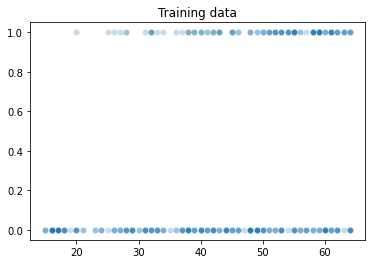

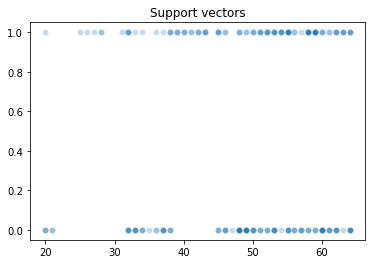

In [5]:
# svm.intercept_
# svm.coef_ # only for 'linear' kernel
# svm.support_vectors_
# svm.support_

# For example, we can view the items in the training set that formed the support vector
sns.scatterplot(x = xtrain[:, 0], y = ytrain, alpha = 0.25)
plt.title("Training data")
plt.show()

sns.scatterplot(x = xtrain[svm.support_][:, 0], y = ytrain[svm.support_], alpha = .25)
plt.title("Support vectors")
plt.show()

The SVM class has a `score` function that returns the accuracy of a test set, plus prediction functions.

In [6]:
# Percent of correct classifications
svm.score(X = xtrain, y = ytrain)
svm.score(X = xtest, y = ytest)

0.646551724137931

In [7]:
ypreds = svm.predict(X = xtest)
ypreds

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1])

However, soft prediction requires configuring the initial model to do soft classification (by default, SVMs are made to only do hard classification).

In [8]:
svm_soft = SVC(probability = True) # indicate that you want the SVM to do soft classification
svm_soft.fit(X = xtrain, y = ytrain)

ypreds_soft = svm_soft.predict_proba(X = xtest)
ypreds_soft

# svm.predict_proba(X = xtest)

array([[0.71642302, 0.28357698],
       [0.71733221, 0.28266779],
       [0.67236371, 0.32763629],
       [0.71695263, 0.28304737],
       [0.446145  , 0.553855  ],
       [0.71643512, 0.28356488],
       [0.72071767, 0.27928233],
       [0.51253261, 0.48746739],
       [0.71733221, 0.28266779],
       [0.44981821, 0.55018179],
       [0.47280279, 0.52719721],
       [0.71677928, 0.28322072],
       [0.71643512, 0.28356488],
       [0.45134354, 0.54865646],
       [0.71519029, 0.28480971],
       [0.67236371, 0.32763629],
       [0.71718391, 0.28281609],
       [0.53679641, 0.46320359],
       [0.71519029, 0.28480971],
       [0.72062973, 0.27937027],
       [0.71644271, 0.28355729],
       [0.71644271, 0.28355729],
       [0.70196615, 0.29803385],
       [0.71733221, 0.28266779],
       [0.71642302, 0.28357698],
       [0.46070889, 0.53929111],
       [0.71733221, 0.28266779],
       [0.71027358, 0.28972642],
       [0.46070889, 0.53929111],
       [0.446145  , 0.553855  ],
       [0.

Note: ROC curves require this soft prediction

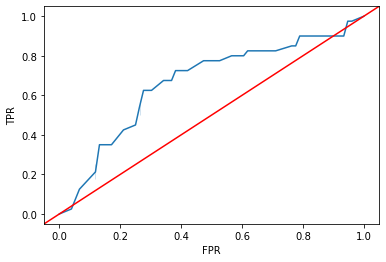

In [9]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(
    y_true = ytest,
    y_score = ypreds_soft[:, 1],
    pos_label = 1
)


sns.lineplot(x = fpr, y = tpr)
plt.axline(xy1 = (0, 0), slope = 1, c = "r")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

***

# Classifier Wrap-Up

This is just a sample of what's out there!

There are a number of other common classifiers you should take a look at if you're interested:
- Naive Bayes ([here](https://scikit-learn.org/stable/modules/naive_bayes.html))
- Discriminant analysis ([linear](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) and [quadratic](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html))
- Neural networks ([here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))
- Random forests ([here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) (related to decision trees)
- Gradient boosted trees ([here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html))
- ...

The main goal of this lecture is to show you some of the creative ways that people solve classification problems and how the scikit-learn library supports these solutions. 

This should empower you to go off and try some of these other ones on your own!

***

# Ethics in computational social science

## Overview

- Why discuss ethics of computational social science?
- What are some of the most salient principles we should adhere to, and how do they arise?
    - Be sensitive to personal privacy
    - Be sensitive to bias and inequality
    - Be sensitive to models that can have unethical agency of their own!


## Why discuss ethics of computational social science?

**1. Issues of fairness and ethical use of data arise *the moment* you start building models**

This is from the same `sklearn` dataset repository that we've been drawing on all quarter!

![boston](img/boston_housing.png)

([Source](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html))


**2. These issues are more and more prescient as rich computational modeling infiltrates our lives**

![ai_spend](img/ai_spend.png)

([Source](https://news.harvard.edu/gazette/story/2020/10/ethical-concerns-mount-as-ai-takes-bigger-decision-making-role/))


**Failure to adhere to ethical standards in computational social science can have serious impacts**

There are many examples of the consequences of misusing the tools we learn in this class; today we'll cover a handful but you may be familiar with others already!

Note: many of the examples and topics we'll discuss today extend well beyond the basics of computational social science. However, more advanced artificial intelligence is built on many of the same techniques and ideas as the modeling we've been discussing this quarter (and will talk about in the next 2-3 weeks). 

Therefore, it's worth thinking about these issues even as general practitioners of modeling and computational work!

## Ethics Position: be sensitive to ways your models can violate privacy

**The availability of massive behavioral datasets online offers a rich opportunity for research and modeling.**

However, in some cases, collection of certain kinds of data may run against existing legal frameworks.

![facebook](img/facebook.png)

([Source](https://techcrunch.com/2022/02/14/texas-attorney-general-files-lawsuit-against-meta-over-facebooks-facial-recognition-technology/))

In other cases, ethics of data collection can be more subtle. 
- For example, most human behavior experiments require informed consent from participants. 

*If you're using data to train a model, should you have to obtain consent from the people whose data you're using?*

**People's data, even when it is meant to keep identities safe, may be easily de-anonymized by adversarial actors when it is made publicly available.**

![netflix](img/netflix.png)

([Source](https://arxiv.org/pdf/cs/0610105.pdf))

***What happened here??* The Netflix Challenge is a canonical example of good intentions gone awry.**
- The key to de-anonymization (in this case) was aligning information in the Netflix dataset with other publicly available info (IMDB reviews) to learn *new* information from the Netflix dataset.

**When this data contains medical information or potentially sensitive consumer records, the consequences of de-anonymization can be serious.**

![jane-doe](img/jane_doe.png)

([Source](https://www.wired.com/2009/12/netflix-privacy-lawsuit/))


**Take-away: data that is meant to protect privacy may not always do so.**

Be aware of this any time you're generating, distributing, or working with large datasets.

***What else can you do?***

- There *are* ways to safeguard people's data and use it responsibly. But it requires thoughtful and responsible engineering.
- Lots of debate about whether certain data should be collected in the first place. This has led to interesting ideas about how to do good modeling *without* keeping sensitive data around.

![apple](img/apple.png)

([Source](https://ui.adsabs.harvard.edu/abs/2021arXiv210203316C/abstract); see more approachable blog post [here](https://machinelearning.apple.com/research/learning-with-privacy-at-scale))

**Take-away (more positive): respect for user privacy can open the door to innovative modeling and data science.**



## Ethics Position: be sensitive to ways your models can introduce bias or inequality

Much of the conversation around ethics in AI and computational modeling focuses on the risks of models introducing or reinforcing bias and inequality.  

In 2022, I probably don't need to tell you that this can have very serious consequences for people's lives and livelihoods. 

Here, the problem is typically that the model is trained or otherwise relies on data that is fundamentally biased or lacks representation. As a result, the *predictive features* the model learns for classification, regression, or other processes have the same underlying bias(es). 

**This is an important concept in all modeling contexts, sometimes called "garbage in, garbage out"**. In general terms, it says that shortcomings or misrepresentations in your data will emerge in your model.

Below, I'm going to walk through a few examples of how bias or inequality can arise in important settings, and the complications of thinking about computational models of decision making in these settings.


### Criminal justice

As noted in our classification intro lecture, classification and similar classes of models are in widespread use in the criminal justice system, where they take in data about a defendant's prior history and other information that might help in making sentencing or parole decisions, then make recommendations based on the perceived risk of recidivism.

![nyt_rai](img/nyt_rai.png)

([Source](https://www.nytimes.com/2020/02/06/technology/predictive-algorithms-crime.html))

However, these algorithms have faced widespread criticism for reinforcing racial biases in the criminal justice system due to their reliance on prior criminal records, which are seen as disproportionately punishing black people.

![mit_rai](img/mit_rai.png)

([Source](https://www.technologyreview.com/2019/01/21/137783/algorithms-criminal-justice-ai/))


>"One of the most concerning possible sources of bias can come from the historical outcomes that an RAI [risk assessment instrument] learns to predict. If these outcomes are the product of unfair practices, it is possible that any derivative model will learn to replicate them, rather than predict the true underlying risk for misconduct."

Part of what makes this issue difficult is that in many cases, these tools may be replacing people who are just as fallible:

>"The authors found that if judges had used their proposed checklist-style model to determine pretrial release, decisions would have been more consistent across cases, and they would have detained 30% fewer defendants overall without a corresponding rise in pretrial misconduct."

([Source](https://www.brookings.edu/research/understanding-risk-assessment-instruments-in-criminal-justice/))


The strain on the criminal justice system creates increasing demand for algorithmic solutions even as many people object to their use:

>"Last July, more than 100 civil rights and community-based organizations, including the ACLU and the NAACP, signed a statement urging against the use of risk assessment. At the same time, more and more jurisdictions and states, including California, have turned to them in a hail-Mary effort to fix their overburdened jails and prisons."

([Source](https://www.technologyreview.com/2019/01/21/137783/algorithms-criminal-justice-ai/))

*Is this a problem of reinforcing bad decisions with biased data, or improving on fallible human decisions with more systematic policies?*


### Hiring

Another area where computational models can support more efficient decision making is when hiring people.

Here, the model can use a rich set of inputs related to a candidate's qualifications and make recommendations about their fit for a role.

As with criminal justice, this is an area where advocates argue that the use of algorithmic tools can improve fairness and avoid human biases (note that's not what the article below is about):

![hiring_bias](img/hiring_bias.png)

([Source](https://hbr.org/2019/06/how-to-reduce-personal-bias-when-hiring))

However, here again we encounter concerns that the algorithms themselves have biases of their own.

![amazon](img/amazon.png)

([Source](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G))

Once again, these biases arise because of biases in the underlying data that the algorithms were trained with.

![amazon_bias](img/amazon_bias.png)

(Source: same as above)

*How can these systems be improved to avoid these issues?*


## Ethics Position: be sensitive to ways your models can be misused or behave unethically

Whereas concerns about data that is biased or violates privacy have been around for a little while, the possibility of AI acting in unexpected ways or being used unethically is a growing issue.

Here, we'll talk about two different versions of this concern (but there are probably others!):
1. Models in bad hands
2. Models doing bad things on their own(ish)

Note: this category of modeling ethics is often thought of or described in very futuristic terms ("the AI takeover"). In some cases, the concerns people have are very forward-looking. But, as some of the examples below illustrate, people run up against this concern in much more benign ways. 


### Models in the hands of "bad actors"

Large artificial intelligence models are created for many different purposes (including basic research), but people have also pointed out out various ways in which they can be used for unethical purposes.

Here's a fun example from discussions about recent advances in "Large Language Models". 

![ai_papers](img/ai_papers.png)

The author points out that this concern isn't limited to students: teachers could just as easily ask a language model like this to evaluate student short answer responses. 

This is probably *not* what the designers of large language models had in mind. 

**Does this mean we shouldn't build large language models?**

No, but it does underscore the need to be thoughtful about the unexpected uses of our models!


### Models making bad decisions of their own

Increasingly, we may find ourselves trusting large computational models in risky or high-stakes scenarios. In some cases, this may represent a welcome change!

However, it's important to be aware of the ways that this trust can lead to AI behavior that challenges our ethics. 

The example often used in this conversation is self-driving cars.

![self_driving](img/tesla.png)

([Source](https://www.washingtonpost.com/nation/2021/04/19/tesla-texas-driverless-crash/))

In the above example, it was an error by the self-driving model that led to the crash. 

However, in this case, the Tesla software was not found to be at fault because the driver had enough time to override and correct the car's self-driving.

**While concerns about the testing and reliability of self-driving car software are important, so too is the fact that driving accidents are a leading cause of death *without* self-driving cars.**

> "Despite claims to the contrary, self-driving cars currently have a higher rate of accidents than human-driven cars, but the injuries are less severe. On average, there are 9.1 self-driving car accidents per million miles driven, while the same rate is 4.1 crashes per million miles for regular vehicles."

([Source](https://www.natlawreview.com/article/dangers-driverless-cars))


### Hybrid: models in the hands of "bad actors" making bad decisions

In some cases, the line between a model behaving badly on its own and being used for nefarious purposes can be a litte blurry. 

Here's a fairly canonical example. In 2016, Microsoft released a chat bot named "Tay" whose purpose was to learn novel uses of language by engaging with people on Twitter:


![Tay](img/Tay.png)

([Source](https://spectrum.ieee.org/in-2016-microsofts-racist-chatbot-revealed-the-dangers-of-online-conversation))

**Unfortunately, things very quickly went South for Tay...**

Tay was shut down after only 16 hours online. *Why?*
- Tay began unexpectedly tweeting racist and highly offensive content
- Once again, this is presumably not what her engineers had in mind...

**How did this happen?**

A concerted effort of online users were able to steer the model's language learning through the inputs they provided. 

![Tay_downfall](img/Tay_downfall.png)

(Source: same as above)

# Summary

How can we think about a more general framework for ethics in modeling? 

This is beyond the scope of this lecture (and my knowledge!), but here are some guideposts:


## Data considerations (inputs)

Most of the issues outlined above center on *data*, the model's *inputs*.
- Models used in business and public sector work often require large amounts of data to train and validate.
- This raises ethical concerns about the data's *source* and its *representativeness*. 

Here are some things you should think about when modeling large datasets:

1. Where does your data *come from*?
- Collecting and distributing this data can introduce concerns around privacy and consent

2. Is your data *representative*?
- If your data has significant biases or doesn't represent certain populations, your model risks making predictions, classifications, or recommendations that reflect these same biases or omissions.


## Model behavior considerations (outputs)

Not all of the ethical considerations that arise with modeling and AI are centered on data. In some cases, the model's *behavior itself* may be deemed unethical.

Here are some things worth considering when it comes to the model's *output*:

1. Could this model be a problem in the hands of *bad actors*?
- Models that are initially constructed for one purpose can be misused. What are the potential consequences?
- Note: potential bad consequences don't mean we *shouldn't* use the model, but it's an important discussion.

2. Could this model engage in behavior that would be considered unethical or harmful through its normal operations?
- Models that are used in high stakes settings (e.g., driving) may make decisions that can harm others. What kinds of harm or undesired behavior can we anticipate when leveraging a model?
- Note: once again, the potential for harm may not be in and of itself a reason to avoid the model (self-driving cars are likely to get in accidents) but once again, this is an important discussion to have.


## Future Directions

Issues of ethical AI and modeling are at the forefront of many public policy debates. 

If you're interested in this, take a look at discussions of "transparent" or "explainable" AI ([wikipedia](https://en.wikipedia.org/wiki/Explainable_artificial_intelligence)), or other specific initiatives aimed at providing oversight into how AI gets used in various setting (e.g. [this](https://pretrialrisk.com/) group for monitoring use of risk assessment tools in criminal settings).


# Resources

Summer Institute for Computational Social Science (SICCS) [website](https://sicss.io/overview)
- Lots of cool content here, including stuff you might be interested in that we don't cover in this course!

